In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import sys
import os

import numpy as np
import pandas as pd

sys.path.append('../../')

In [2]:
IN_FILE = ("perf_node-test-case-06-1024x10.txt")
LIDAR_MODE = "1024x10"

df = pd.read_csv(IN_FILE, sep=",", header=0)

In [3]:
# Adapted from some work I did on the ifm3d project:
# https://github.com/ifm/ifm3d/blob/master/doc/jitter/jitter.ipynb

def plot_raw(df, title=''):
    ax = df.plot(marker='.', linestyle='', grid=True, title=title)
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Latency (ms)")
    return df

def plot_pct(df, title):
    df2 = df.quantile(q=np.linspace(0,1,df.shape[0]))
    ax = df2.plot(marker='x', linestyle='', grid=True, title=title)
    ax.set_xlabel("% of sample")
    ax.set_ylabel("Latency (ms)")
    return df2

<IPython.core.display.Javascript object>


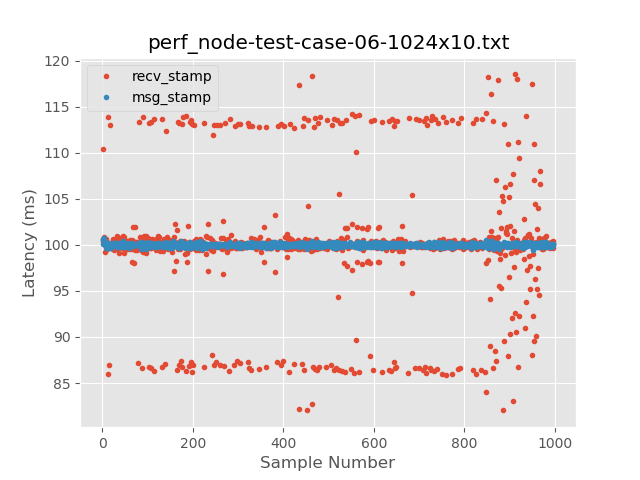

In [4]:
df2 = df.diff()*1e-6
_ = plot_raw(df2, IN_FILE)

<IPython.core.display.Javascript object>


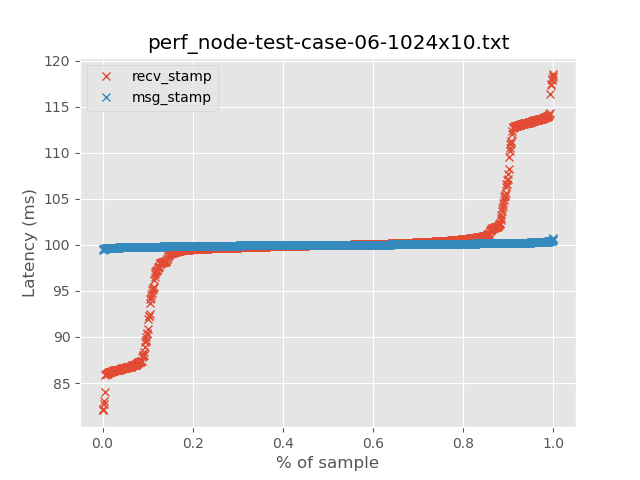

In [5]:
df3 = plot_pct(df2, IN_FILE)

In [6]:
df2.describe()

,recv_stamp,msg_stamp
count,997.000000,997.000000
mean,100.012644,100.001650
std,6.163530,0.158013
min,82.028598,99.485117
25%,99.643160,99.903825
50%,99.981776,100.001435
75%,100.407192,100.090463
max,118.514961,100.717319


In [7]:
df2_median = df2.median()
df2_median

recv_stamp     99.981776
msg_stamp     100.001435
dtype: float64

In [8]:
# The MAD gives us: "the most typical deviation from the most typical latency of X ms will be Y ms".
np.abs(df2.recv_stamp - df2_median.recv_stamp).median(), np.abs(df2.msg_stamp - df2_median.msg_stamp).median() 

(0.37123499999999865, 0.09318100000000129)

<IPython.core.display.Javascript object>


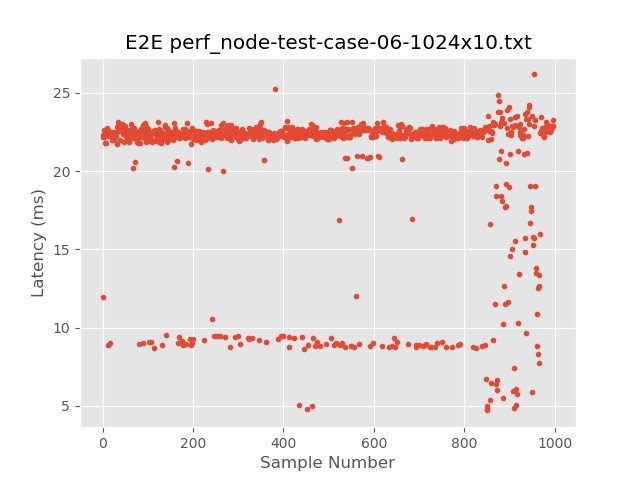

In [9]:
df_e2e = (df.recv_stamp - df.msg_stamp) * 1e-6
_ = plot_raw(df_e2e, "E2E %s" % IN_FILE)

<IPython.core.display.Javascript object>


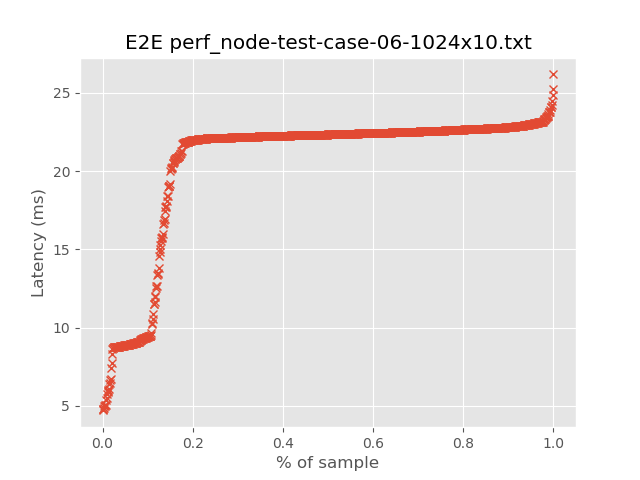

In [10]:
df4 = plot_pct(df_e2e, "E2E %s" % IN_FILE)

In [11]:
df_e2e.describe()

count    998.000000
mean      20.590866
std        4.593612
min        4.700873
25%       22.108552
50%       22.344869
75%       22.585347
max       26.182429
dtype: float64

In [12]:
df_e2e_median = df_e2e.median()
df_e2e_median

22.344869

In [13]:
np.abs(df_e2e - df_e2e_median).median()

0.23938049999999933